In [87]:
pip install jupyter-repo2docker

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.7/175.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 24.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import geosnap as gio
from geosnap import DataStore
from geosnap.io import get_census, get_acs, get_nces, store_acs
import libpysal as ps
from libpysal.weights import Queen

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
sd_boundary = gpd.read_file("~/github/15-minute-analysis/15-minute-package/data/sd_boundary/san_diego_boundary_datasd.shp")

<Axes: >

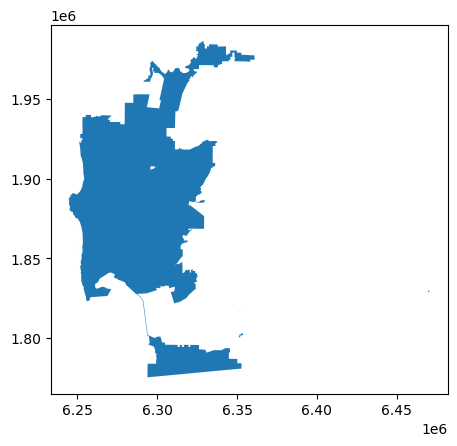

In [3]:
sd_boundary.plot()

In [4]:
#internet pull
#datasets = DataStore("data/geosnap/")

In [2]:
#local directory pull FROM store_acs command
datasets = DataStore("data/acs/acs_2021_tract.parquet")

In [3]:
demo = get_acs(datasets, county_fips='06073', years=[2021], level='tract')

/opt/tljh/user/lib/python3.10/site-packages/geosnap/_data.py:16: UserWarning: Streaming data from S3. Use `geosnap.io.store_acs()` to store the data locally for better performance
  warn(warning_msg)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/util.py:275: UserWarning: Unable to find local adjustment year for 2021. Attempting from online data
  warn(
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/constructors.py:215: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


In [5]:
store_acs?

Signature: store_acs(years='all', level='tract', data_dir='auto')
Docstring:
Save census American Community Survey 5-year data to the local geosnap storage.
   Each year is about 550mb for tract level and about 900mb for blockgroup level.

 Parameters
----------
years : list (optional)
    subset of years to collect. Default is 'all' to fetch every available vintage.
    Currently 2012-2021 vintages are available
level : str (optional)
    geography level to fetch. Options: {'tract', 'bg'} for tract
    or blockgroup

Returns
-------
None
    Data will be available in the geosnap.data.datasets and will be used
    in place of streaming data for all census queries.
File:      /opt/tljh/user/lib/python3.10/site-packages/geosnap/io/storage.py
Type:      function

In [85]:
#store_acs(years='2021', level='tract', data_dir='.')

Loading manifest: 100%|██████████| 25/25 [00:00<00:00, 21.3k/s]
100%|██████████| 624M/624M [00:22<00:00, 27.5MB/s]  


In [9]:
acs = gpd.read_parquet("~/github/15-minute-analysis/15-minute-package/data/acs/acs_2021_tract.parquet")
acs

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,15.0,0.0,0.0,0.0,0.0,209.0,86.0,14.0,5.0,0.0,...,8.151870,15.354551,0.949190,3.629257,13.791178,0.390843,0.335008,0.000000,0.0,"MULTIPOLYGON (((-86.51038 32.47225, -86.51031 ..."
01001020200,10.0,0.0,0.0,0.0,0.0,35.0,18.0,0.0,3.0,12.0,...,5.870647,6.625142,1.302378,0.679502,1.075878,5.492639,0.000000,0.000000,0.0,"MULTIPOLYGON (((-86.48127 32.47744, -86.48126 ..."
01001020300,13.0,0.0,0.0,0.0,14.0,73.0,61.0,0.0,43.0,7.0,...,9.784736,17.165222,2.711770,3.578418,6.541795,10.176125,0.000000,0.000000,0.0,"MULTIPOLYGON (((-86.47087 32.47573, -86.47084 ..."
01001020400,9.0,0.0,3.0,2.0,27.0,51.0,179.0,0.0,175.0,44.0,...,14.308259,8.074698,0.683851,0.420831,8.074698,0.000000,0.236718,0.000000,0.0,"MULTIPOLYGON (((-86.45394 32.49317, -86.45372 ..."
01001020501,0.0,0.0,95.0,0.0,65.0,66.0,510.0,0.0,187.0,0.0,...,17.301986,18.032413,0.867382,2.784752,3.674960,13.695503,0.000000,0.000000,0.0,"MULTIPOLYGON (((-86.43842 32.44973, -86.43838 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153750501,0.0,8.0,4703.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,...,2.165230,47.193609,10.510826,3.804919,33.067059,0.714736,47.193609,0.000000,0.0,"MULTIPOLYGON (((-66.87725 18.03491, -66.87643 ..."
72153750502,10.0,0.0,2861.0,0.0,6.0,14.0,0.0,0.0,10.0,NaN,...,0.731452,44.514107,4.110066,5.259491,31.104145,1.741553,44.514107,0.557297,0.0,"MULTIPOLYGON (((-66.86686 18.02212, -66.86632 ..."
72153750503,0.0,0.0,2010.0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,...,1.293532,43.233831,10.796020,2.288557,32.537313,0.547264,43.233831,0.000000,0.0,"MULTIPOLYGON (((-66.88788 18.03583, -66.88770 ..."


In [11]:
acs['GEOID'] = acs.index
acs

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,GEOID
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,15.0,0.0,0.0,0.0,0.0,209.0,86.0,14.0,5.0,0.0,...,15.354551,0.949190,3.629257,13.791178,0.390843,0.335008,0.000000,0.0,"MULTIPOLYGON (((-86.51038 32.47225, -86.51031 ...",01001020100
01001020200,10.0,0.0,0.0,0.0,0.0,35.0,18.0,0.0,3.0,12.0,...,6.625142,1.302378,0.679502,1.075878,5.492639,0.000000,0.000000,0.0,"MULTIPOLYGON (((-86.48127 32.47744, -86.48126 ...",01001020200
01001020300,13.0,0.0,0.0,0.0,14.0,73.0,61.0,0.0,43.0,7.0,...,17.165222,2.711770,3.578418,6.541795,10.176125,0.000000,0.000000,0.0,"MULTIPOLYGON (((-86.47087 32.47573, -86.47084 ...",01001020300
01001020400,9.0,0.0,3.0,2.0,27.0,51.0,179.0,0.0,175.0,44.0,...,8.074698,0.683851,0.420831,8.074698,0.000000,0.236718,0.000000,0.0,"MULTIPOLYGON (((-86.45394 32.49317, -86.45372 ...",01001020400
01001020501,0.0,0.0,95.0,0.0,65.0,66.0,510.0,0.0,187.0,0.0,...,18.032413,0.867382,2.784752,3.674960,13.695503,0.000000,0.000000,0.0,"MULTIPOLYGON (((-86.43842 32.44973, -86.43838 ...",01001020501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153750501,0.0,8.0,4703.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,...,47.193609,10.510826,3.804919,33.067059,0.714736,47.193609,0.000000,0.0,"MULTIPOLYGON (((-66.87725 18.03491, -66.87643 ...",72153750501
72153750502,10.0,0.0,2861.0,0.0,6.0,14.0,0.0,0.0,10.0,NaN,...,44.514107,4.110066,5.259491,31.104145,1.741553,44.514107,0.557297,0.0,"MULTIPOLYGON (((-66.86686 18.02212, -66.86632 ...",72153750502
72153750503,0.0,0.0,2010.0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,...,43.233831,10.796020,2.288557,32.537313,0.547264,43.233831,0.000000,0.0,"MULTIPOLYGON (((-66.88788 18.03583, -66.88770 ...",72153750503


In [12]:
acs.columns

Index(['n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop', 'n_russian_pop',
       'n_italian_pop', 'n_german_pop', 'n_irish_pop', 'n_scandaniavian_pop',
       'n_foreign_born_pop', 'n_recent_immigrant_pop',
       ...
       'p_poverty_rate', 'p_poverty_rate_over_65', 'p_poverty_rate_children',
       'p_poverty_rate_white', 'p_poverty_rate_black',
       'p_poverty_rate_hispanic', 'p_poverty_rate_native',
       'p_poverty_rate_asian', 'geometry', 'GEOID'],
      dtype='object', length=157)

<Axes: >

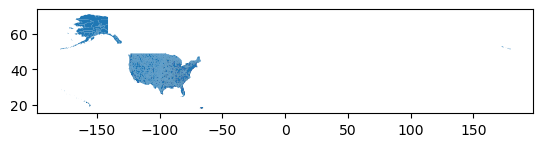

In [11]:
acs.plot()

In [14]:
sd_acs = acs.loc[acs['GEOID'].str.startswith('06073')]
sd_acs

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,GEOID
GEOID,,,,,,,,,,,,,,,,,,,,,
06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,32.0,...,1.623816,0.304465,0.000000,1.082544,0.000000,1.116373,0.0,0.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",06073000100
06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,34.0,...,6.323084,2.771763,0.000000,4.677350,0.000000,0.909485,0.0,0.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",06073000201
06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,115.0,...,4.217016,0.000000,0.123305,3.699137,0.000000,1.331689,0.0,0.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",06073000202
06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,108.0,...,17.155556,0.622222,2.444444,16.311111,0.000000,4.888889,0.0,0.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",06073000301
06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,45.0,...,7.102672,1.265823,0.000000,4.887482,2.215190,3.059072,0.0,0.0,"MULTIPOLYGON (((-117.16400 32.74091, -117.1640...",06073000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06073021900,2273.0,0.0,30.0,0.0,50.0,25.0,44.0,12.0,1004.0,273.0,...,21.531286,0.272056,4.236300,11.465216,0.000000,20.093276,0.0,0.0,"MULTIPOLYGON (((-117.13746 32.67843, -117.1354...",06073021900
06073022000,2015.0,0.0,151.0,0.0,8.0,5.0,10.0,0.0,1833.0,434.0,...,8.651457,2.552519,0.903546,3.930427,0.542128,4.111136,0.0,0.0,"MULTIPOLYGON (((-117.09190 32.68388, -117.0916...",06073022000
06073022101,54.0,0.0,0.0,19.0,17.0,76.0,41.0,0.0,371.0,26.0,...,13.815789,0.000000,3.289474,8.245614,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-117.33371 33.14433, -117.3336...",06073022101


<Axes: >

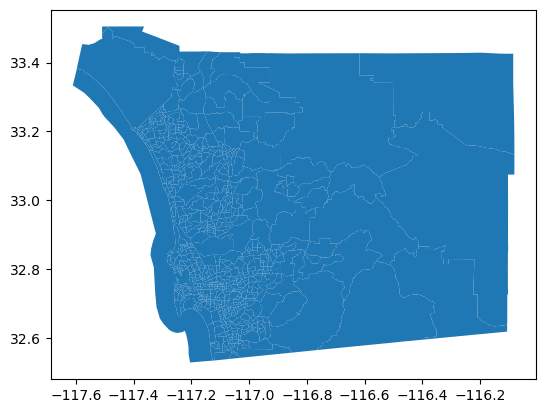

In [15]:
sd_acs.plot()

In [20]:
sd_acs.to_parquet("~/sd_acs.parquet", index=True)

In [61]:
demo.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,year
0,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,...,1.623816,0.304465,0.000000,1.082544,0.00000,1.116373,0.0,0.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",2021
1,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,...,6.323084,2.771763,0.000000,4.677350,0.00000,0.909485,0.0,0.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",2021
2,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,...,4.217016,0.000000,0.123305,3.699137,0.00000,1.331689,0.0,0.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",2021
3,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,...,17.155556,0.622222,2.444444,16.311111,0.00000,4.888889,0.0,0.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",2021
4,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,...,7.102672,1.265823,0.000000,4.887482,2.21519,3.059072,0.0,0.0,"MULTIPOLYGON (((-117.16400 32.74091, -117.1640...",2021


<Axes: >

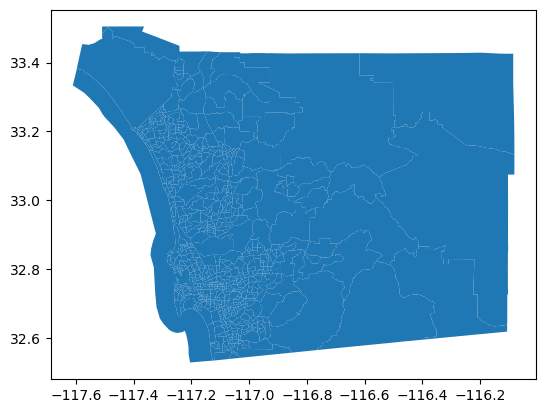

In [62]:
demo.plot()

In [63]:
demo = demo.to_crs(2230)

In [64]:
sd_demo = gpd.overlay(sd_boundary, demo)

In [65]:
sd_demo

,objectid,code,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,year,geometry
0,56,0,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,...,1.623816,0.304465,0.000000,1.082544,0.000000,1.116373,0.000000,0.0,2021,"POLYGON ((6271212.508 1855074.386, 6271393.972..."
1,56,0,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,...,6.323084,2.771763,0.000000,4.677350,0.000000,0.909485,0.000000,0.0,2021,"POLYGON ((6276375.410 1856718.155, 6276654.562..."
2,56,0,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,...,4.217016,0.000000,0.123305,3.699137,0.000000,1.331689,0.000000,0.0,2021,"POLYGON ((6274535.866 1852524.707, 6274558.408..."
3,56,0,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,...,17.155556,0.622222,2.444444,16.311111,0.000000,4.888889,0.000000,0.0,2021,"POLYGON ((6279287.227 1853533.698, 6279509.232..."
4,56,0,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,...,7.102672,1.265823,0.000000,4.887482,2.215190,3.059072,0.000000,0.0,2021,"POLYGON ((6280617.190 1850738.841, 6280617.938..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,58,0,06073021101,1706.0,0.0,0.0,37.0,21.0,407.0,63.0,...,24.136585,3.239024,2.458537,9.034146,0.000000,17.424390,0.253659,0.0,2021,"POLYGON ((6470142.888 1828801.629, 6469603.214..."
388,59,0,06073013425,844.0,0.0,0.0,0.0,25.0,135.0,44.0,...,3.641161,0.000000,1.266491,0.000000,0.000000,3.641161,0.000000,0.0,2021,"POLYGON ((6351578.989 1816599.838, 6351540.000..."
389,59,0,06073021304,648.0,0.0,56.0,7.0,15.0,69.0,23.0,...,1.248439,0.624220,0.000000,1.217228,0.031211,0.405743,0.000000,0.0,2021,"POLYGON ((6351851.468 1816896.781, 6351908.999..."
390,60,0,06073013320,1981.0,25.0,0.0,0.0,56.0,0.0,85.0,...,0.584046,0.000000,0.000000,0.284900,0.000000,0.284900,0.000000,0.0,2021,"POLYGON ((6351742.153 1800646.805, 6351738.500..."


<Axes: >

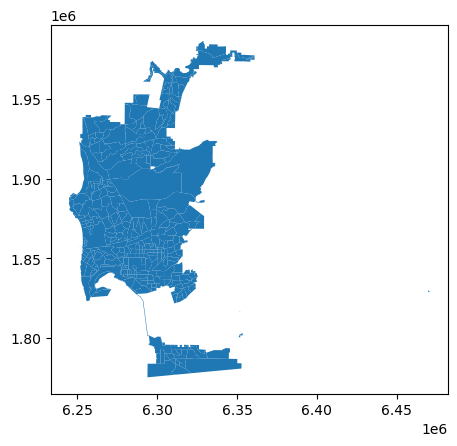

In [66]:
sd_demo.plot()

In [67]:
demo_queen = Queen.from_dataframe(sd_demo, use_index=False)

/opt/tljh/user/lib/python3.10/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 2 islands with ids: 326, 387.
  warnings.warn(message)


In [68]:
sd_demo['component'] = demo_queen.component_labels

In [69]:
sd_demo.component.value_counts()

component
0    386
3      2
4      2
1      1
2      1
Name: count, dtype: int64

In [70]:
sd_demo_WW = sd_demo

In [71]:
sd_demo_WW = sd_demo_WW.loc[sd_demo_WW['component'] == 0]

<Axes: >

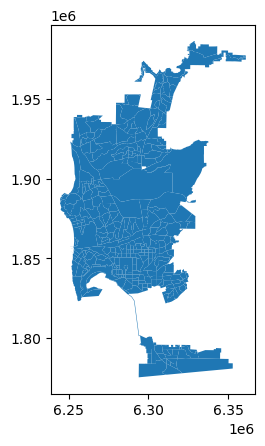

In [72]:
sd_demo_WW.plot()

<Axes: >

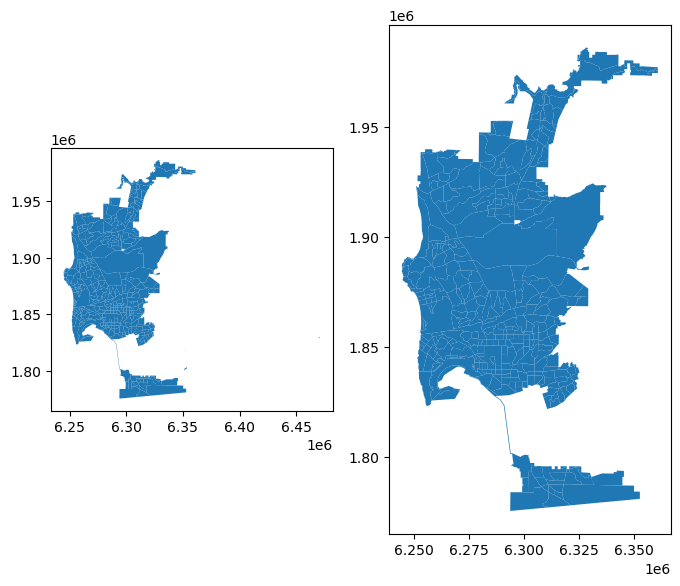

In [73]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8,8))

sd_demo.plot(ax=ax[0])
sd_demo_WW.plot(ax=ax[1])

In [74]:
sd_demo.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [77]:
sd_demo['area'] = sd_demo['geometry'].area / 5280
sd_demo['area']

0      3131.855275
1      1761.805781
2      2662.463913
3       819.104805
4      1013.142227
          ...     
387     119.350272
388      11.262560
389       6.947723
390     448.746188
391      94.855136
Name: area, Length: 392, dtype: float64

In [84]:
sd_demo['pop_density'] = sd_demo['n_total_pop'] / sd_demo['area']
sd_demo['pop_density']

0        0.943849
1        1.310587
2        1.545936
3        2.746901
4        3.002540
          ...    
387     46.376099
388    168.256596
389    461.158258
390     15.703755
391     82.125232
Name: pop_density, Length: 392, dtype: float64

In [40]:
analysis_variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
                      'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 'p_asian_persons']

<Axes: >

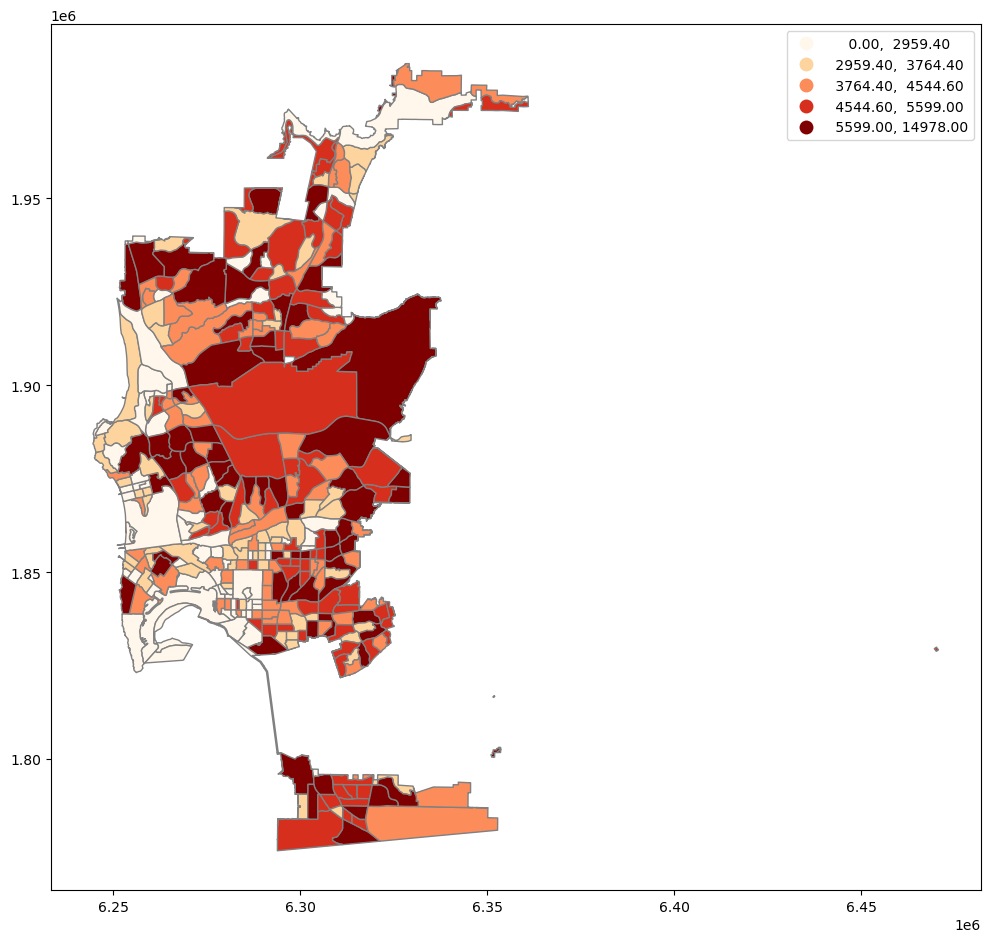

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))

sd_demo.plot(column='n_total_pop', cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True)

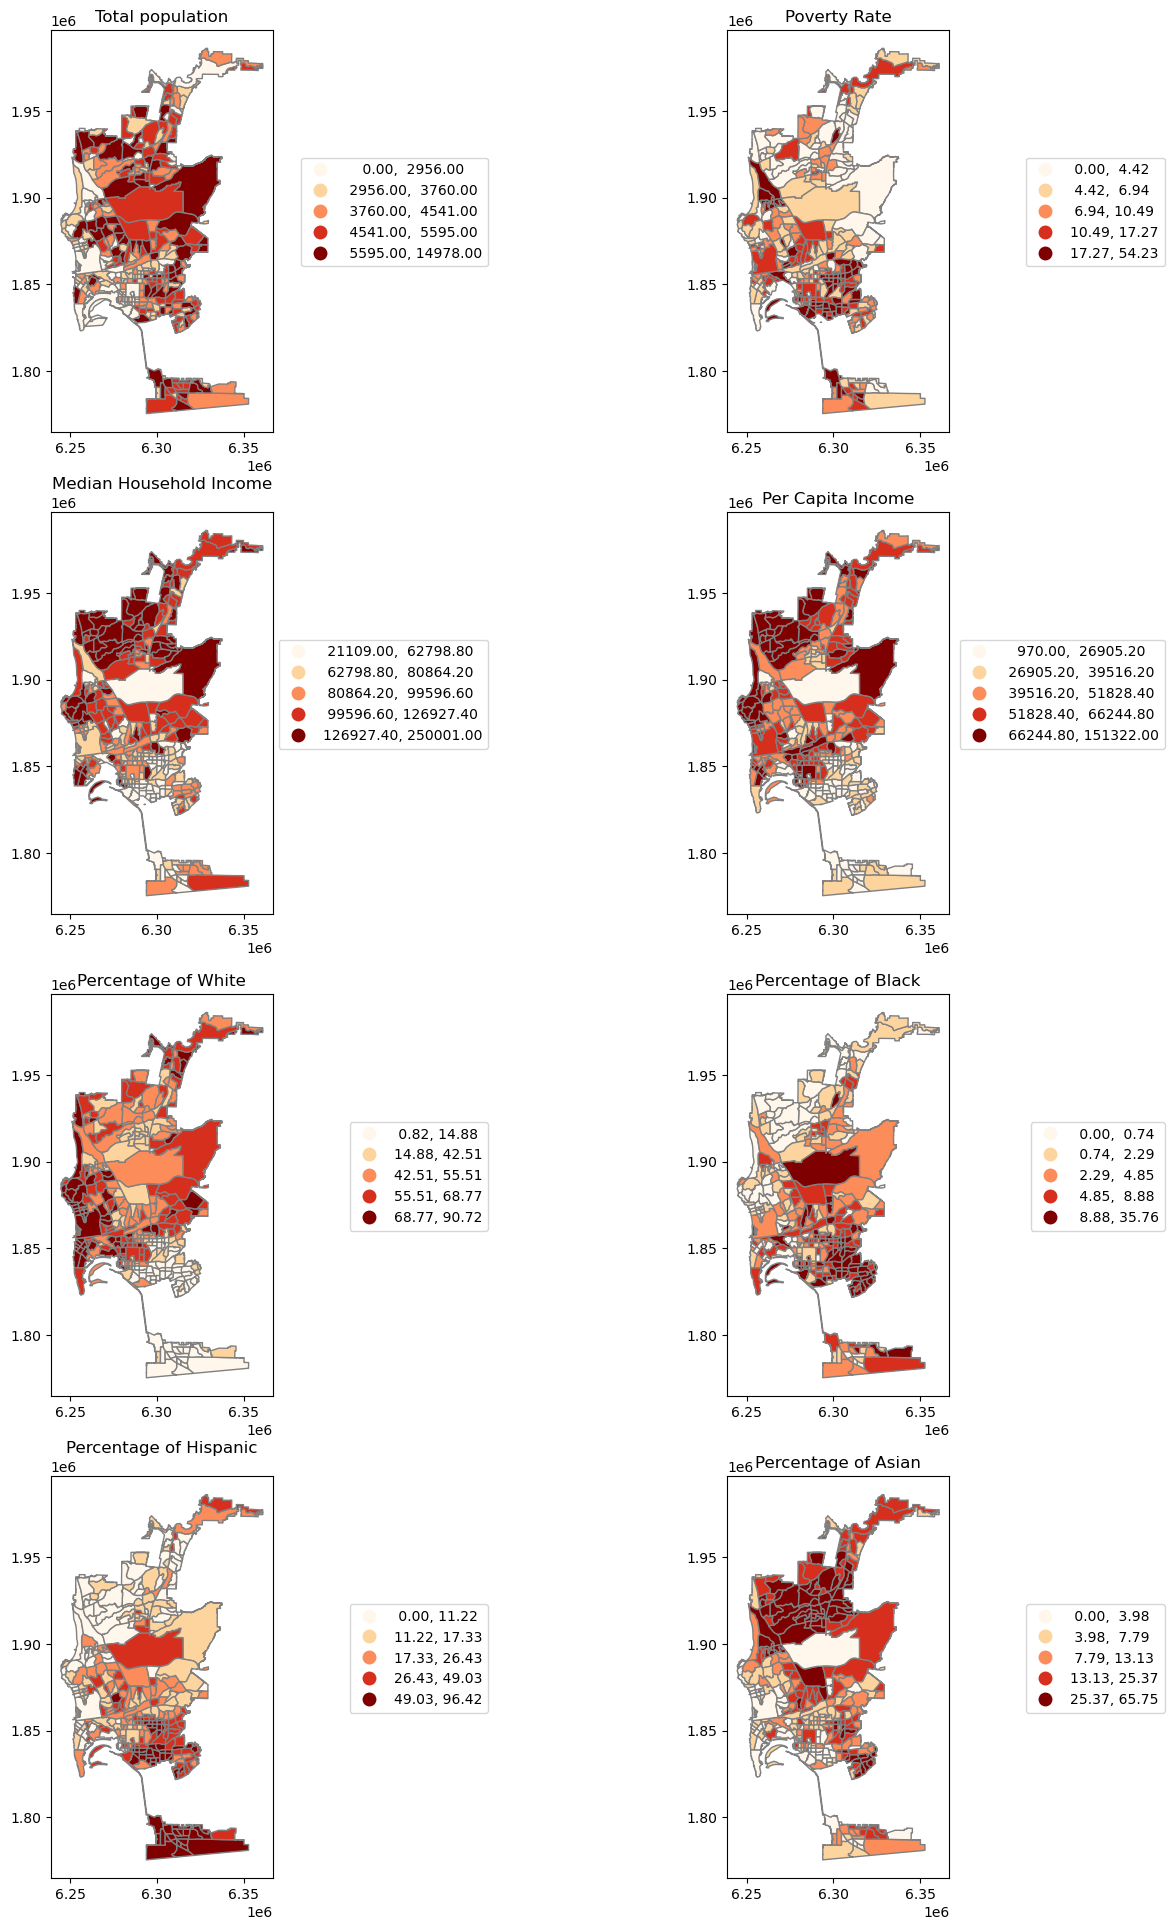

In [43]:
plot_titles = ['Total population', 'Poverty Rate', 'Median Household Income', 'Per Capita Income', 
                      'Percentage of White', 'Percentage of Black','Percentage of Hispanic', 'Percentage of Asian']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
axs=axs.flatten()

for i, col in enumerate(analysis_variables):
    ax=axs[i]
    #sd_demo.plot(column='n_total_pop', cmap='OrRd', scheme='quantiles', k=5, ax=ax[0], edgecolor='grey', legend=True)
    sd_demo_WW.plot(column=col, cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True, legend_kwds={'bbox_to_anchor': (2, 0.7)})
    #ax.set_axis_off()
    ax.set_title(plot_titles[i])

plt.show()

<Axes: >

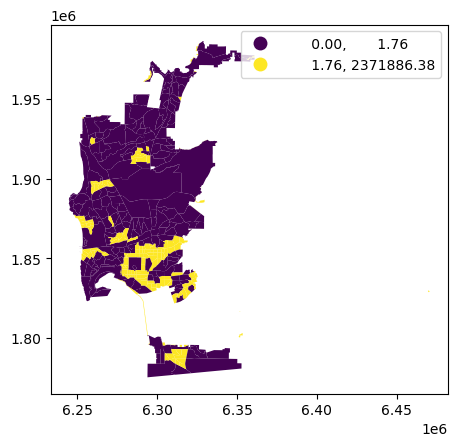

In [82]:
sd_demo.plot(column='pop_density', scheme='quantiles', k=2, legend=True)

In [83]:
neigh = gpd.read_file('~/15_Project/nei/cmty_plan_datasd.shx')

In [46]:
sd_demo_variables = gpd.GeoDataFrame(sd_demo[analysis_variables], geometry=sd_demo['geometry']) 
sd_demo_variables

,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,2956.0,1.623816,160990.0,96996.0,77.604871,0.000000,14.445196,3.958051,"POLYGON ((6271212.508 1855074.386, 6271393.972..."
1,2309.0,6.323084,94629.0,100047.0,82.503248,0.389779,5.326981,5.586834,"POLYGON ((6276375.410 1856718.155, 6276654.562..."
2,4116.0,4.217016,99651.0,66060.0,71.865889,0.485909,17.322643,6.219631,"POLYGON ((6274535.866 1852524.707, 6274558.408..."
3,2250.0,17.155556,82788.0,74564.0,65.111111,2.311111,19.288889,5.377778,"POLYGON ((6279287.227 1853533.698, 6279509.232..."
4,3042.0,7.102672,71712.0,66441.0,73.668639,1.873767,21.071663,2.629849,"POLYGON ((6280617.190 1850738.841, 6280617.938..."
...,...,...,...,...,...,...,...,...,...
387,5535.0,24.136585,73182.0,28891.0,59.421861,1.680217,35.483288,0.180668,"POLYGON ((6470142.888 1828801.629, 6469603.214..."
388,1895.0,3.641161,162632.0,59177.0,26.279683,8.284960,46.754617,13.614776,"POLYGON ((6351578.989 1816599.838, 6351540.000..."
389,3204.0,1.248439,147734.0,53376.0,73.938826,0.312110,24.126092,1.622971,"POLYGON ((6351851.468 1816896.781, 6351908.999..."
390,7047.0,0.584046,131194.0,36988.0,16.460905,15.283099,37.278274,24.521073,"POLYGON ((6351742.153 1800646.805, 6351738.500..."


In [47]:
sd_demo_variables.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
neigh_overlay = gpd.sjoin(neigh, sd_demo_variables, how='right', predicate='contains')
neigh_overlay

,index_left,objectid,cpcode,cpname,acreage,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,NaN,NaN,NaN,NaN,NaN,2956.0,1.623816,160990.0,96996.0,77.604871,0.000000,14.445196,3.958051,"POLYGON ((6271212.508 1855074.386, 6271393.972..."
1,NaN,NaN,NaN,NaN,NaN,2309.0,6.323084,94629.0,100047.0,82.503248,0.389779,5.326981,5.586834,"POLYGON ((6276375.410 1856718.155, 6276654.562..."
2,46.0,47.0,42.0,Uptown,2674.34356,4116.0,4.217016,99651.0,66060.0,71.865889,0.485909,17.322643,6.219631,"POLYGON ((6274535.866 1852524.707, 6274558.408..."
3,46.0,47.0,42.0,Uptown,2674.34356,2250.0,17.155556,82788.0,74564.0,65.111111,2.311111,19.288889,5.377778,"POLYGON ((6279287.227 1853533.698, 6279509.232..."
4,NaN,NaN,NaN,NaN,NaN,3042.0,7.102672,71712.0,66441.0,73.668639,1.873767,21.071663,2.629849,"POLYGON ((6280617.190 1850738.841, 6280617.938..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,NaN,NaN,NaN,NaN,NaN,5535.0,24.136585,73182.0,28891.0,59.421861,1.680217,35.483288,0.180668,"POLYGON ((6470142.888 1828801.629, 6469603.214..."
388,NaN,NaN,NaN,NaN,NaN,1895.0,3.641161,162632.0,59177.0,26.279683,8.284960,46.754617,13.614776,"POLYGON ((6351578.989 1816599.838, 6351540.000..."
389,NaN,NaN,NaN,NaN,NaN,3204.0,1.248439,147734.0,53376.0,73.938826,0.312110,24.126092,1.622971,"POLYGON ((6351851.468 1816896.781, 6351908.999..."
390,NaN,NaN,NaN,NaN,NaN,7047.0,0.584046,131194.0,36988.0,16.460905,15.283099,37.278274,24.521073,"POLYGON ((6351742.153 1800646.805, 6351738.500..."


<Axes: >

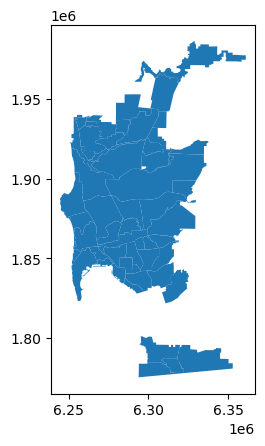

In [49]:
neigh.plot()

<Axes: >

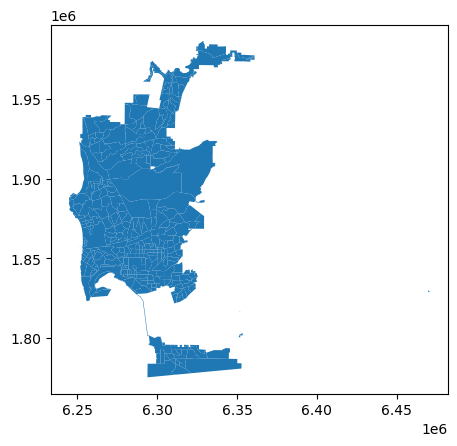

In [50]:
neigh_overlay.plot()